In [3]:
!pip install transformers

In [4]:
!pip install tensorflow transformers keras

In [5]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=d536a32ac1cbb08307456047552ab3c1c9031beb956ef86051b3bd83ef818b50
  Stored in directory: /root/.cache/pip/wheels/6a/67/f8/9cf1a8ff87e0b37f738769df49cc142a655489a6d27b68089f
Successfully built langdetect


In [6]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 46.5 MB/s eta 0:00:00


In [7]:
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 12.0 MB/s eta 0:00:00


In [8]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 70.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 118.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 22.9 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled attrs-18.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradient 2.0.6 requires attrs<=19, but you have attrs 23.1.0 which is incompatible.


In [9]:
# Importing libraries
import math

import numpy as np
import pandas as pd
import torch

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import spacy
import random

from langdetect import detect
from wordcloud import WordCloud

from keras.layers import Input, Dense
from keras.models import Model

from geopy.geocoders import Nominatim
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import BertForSequenceClassification, BertModel, BertTokenizer, TFBertModel
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import DataLoader, Dataset

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords as stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
# Clusters Coordinates file
df1 = pd.read_csv('data/Clusters_Coordinates.csv')
id_coord = df1[['cluster_id', 'lat', 'lng']]


In [9]:
# Main_Dataset file
df2 = pd.read_csv('data/Main_Dataset.csv')
id_col = df2['cluster_id']


In [10]:
# Merging on cluster_id
merged_df = pd.merge(df2, id_coord, on='cluster_id', how='left')


In [11]:
merged_df.to_csv('merged.csv', index=False)


In [13]:
# Looking through the new merged dataset
merged_df


,id,text,user_id,timestamp,cluster_id,lat,lng
0,0,wow didn’t know the homies were coming through...,5.853807e+07,2021-08-02 01:25:46,2,34.020789,-118.411907
1,1,the foggy nights in la be peaceful such a calm...,1.032647e+18,2021-08-28 08:47:36,2,34.020789,-118.411907
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907
3,3,anyone tryna hit the gym 4 hmu,5.490040e+08,2021-08-31 22:41:20,2,34.020789,-118.411907
4,4,are you kidding me this intro is crazy.,2.963951e+07,2021-08-06 03:44:29,2,34.020789,-118.411907
...,...,...,...,...,...,...,...
604201,604201,all students must be dressed appropriately eac...,1.990241e+08,2021-08-12 11:08:07,2996,29.668301,-95.158936
604202,604202,i actually hate working with the lunch shift c...,1.382980e+18,2021-08-04 15:35:10,2996,29.668301,-95.158936
604203,604203,if you’re reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996,29.668301,-95.158936
604204,604204,i mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996,29.668301,-95.158936


In [15]:
# Duplicates
merged_df.duplicated().sum()


0

In [16]:
# Info on the dataset
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 604206 entries, 0 to 604205
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          604206 non-null  int64  
 1   text        604206 non-null  object 
 2   user_id     604206 non-null  float64
 3   timestamp   591412 non-null  object 
 4   cluster_id  604206 non-null  int64  
 5   lat         604206 non-null  float64
 6   lng         604206 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 36.9+ MB


In [17]:
merged_df.describe()


,id,user_id,cluster_id,lat,lng
count,604206.000000,6.042060e+05,604206.000000,604206.000000,604206.000000
mean,302102.500000,3.387228e+17,882.285227,34.560683,-92.389972
std,174419.392711,5.223205e+17,896.044107,7.669379,16.053822
min,0.000000,6.070000e+02,2.000000,13.189300,-158.069430
25%,151051.250000,1.448826e+08,105.000000,30.323346,-100.076888
50%,302102.500000,8.447158e+08,493.000000,34.706027,-89.906309
75%,453153.750000,8.612360e+17,1562.000000,40.655138,-79.541829
max,604205.000000,1.431375e+18,2996.000000,61.235042,-52.829425


In [18]:
# Finding NaN values
merged_df.isna().sum()


id                0
text              0
user_id           0
timestamp     12794
cluster_id        0
lat               0
lng               0
dtype: int64

In [20]:
# Percentage of NaN values across the dataset
merged_df.isna().sum()/len(merged_df)*100


id            0.00000
text          0.00000
user_id       0.00000
timestamp     2.11749
cluster_id    0.00000
lat           0.00000
lng           0.00000
dtype: float64

In [22]:
# Get the list of supported languages for stopwords
languages = stopwords.fileids()

# Extract the language abbreviations
language_abbreviations = [lang[:2] for lang in languages]

# Print the language abbreviations
print(language_abbreviations)


['ar', 'az', 'ba', 'be', 'ca', 'ch', 'da', 'du', 'en', 'fi', 'fr', 'ge', 'gr', 'he', 'hi', 'hu', 'in', 'it', 'ka', 'ne', 'no', 'po', 'ro', 'ru', 'sl', 'sp', 'sw', 'ta', 'tu']


In [25]:
# Download the required stopwords for all languages
nltk.download('stopwords')

# Define the set of stopwords for all languages
all_stopwords = set(stopwords.words('arabic')).union(set(stopwords.words('azerbaijani'))).union(set(stopwords.words('danish'))) \
    .union(set(stopwords.words('dutch'))).union(set(stopwords.words('english'))).union(set(stopwords.words('finnish'))) \
    .union(set(stopwords.words('french'))).union(set(stopwords.words('german'))).union(set(stopwords.words('greek'))) \
    .union(set(stopwords.words('hungarian'))).union(set(stopwords.words('indonesian'))).union(set(stopwords.words('italian'))) \
    .union(set(stopwords.words('kazakh'))).union(set(stopwords.words('nepali'))).union(set(stopwords.words('norwegian'))) \
    .union(set(stopwords.words('portuguese'))).union(set(stopwords.words('russian'))).union(set(stopwords.words('spanish'))) \
    .union(set(stopwords.words('swedish'))).union(set(stopwords.words('turkish')))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Function to remove stopwords from a text string
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.casefold() not in all_stopwords]
    return ' '.join(filtered_words)

# Apply stopword removal to the 'text' column in merged_df
merged_df['text_cleaned'] = merged_df['text'].apply(remove_stopwords)

# Print the updated DataFrame
print(merged_df)


            id                                               text  \
0            0  wow didn’t know the homies were coming through...   
1            1  the foggy nights in la be peaceful such a calm...   
2            2                                    khamisvideobomb   
3            3                     anyone tryna hit the gym 4 hmu   
4            4            are you kidding me this intro is crazy.   
...        ...                                                ...   
604201  604201  all students must be dressed appropriately eac...   
604202  604202  i actually hate working with the lunch shift c...   
604203  604203                      if you’re reading thisyo mama   
604204  604204                                   i mean secondddd   
604205  604205  mixing different kinds of tide pods and downy ...   

             user_id            timestamp  cluster_id        lat         lng  \
0       5.853807e+07  2021-08-02 01:25:46           2  34.020789 -118.411907   
1       1.0

In [29]:
merged_df['text'] = merged_df['text_cleaned']  # Replace 'text' column with 'text_cleaned' column
merged_df = merged_df.drop('text_cleaned', axis=1)  # Drop the 'text_cleaned' column

# Print the updated DataFrame
print(merged_df)


            id                                               text  \
0            0                   wow ’ know homies coming . lit .   
1            1           foggy nights peaceful calming chill vibe   
2            2                                    khamisvideobomb   
3            3                         anyone tryna hit gym 4 hmu   
4            4                              kidding intro crazy .   
...        ...                                                ...   
604201  604201  students must dressed appropriately day arrive...   
604202  604202         actually hate working lunch shift crew job   
604203  604203                              ’ reading thisyo mama   
604204  604204                                     mean secondddd   
604205  604205  mixing different kinds tide pods downy unstopp...   

             user_id            timestamp  cluster_id        lat         lng  
0       5.853807e+07  2021-08-02 01:25:46           2  34.020789 -118.411907  
1       1.032

In [30]:
merged_df

,id,text,user_id,timestamp,cluster_id,lat,lng
0,0,wow ’ know homies coming . lit .,5.853807e+07,2021-08-02 01:25:46,2,34.020789,-118.411907
1,1,foggy nights peaceful calming chill vibe,1.032647e+18,2021-08-28 08:47:36,2,34.020789,-118.411907
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907
3,3,anyone tryna hit gym 4 hmu,5.490040e+08,2021-08-31 22:41:20,2,34.020789,-118.411907
4,4,kidding intro crazy .,2.963951e+07,2021-08-06 03:44:29,2,34.020789,-118.411907
...,...,...,...,...,...,...,...
604201,604201,students must dressed appropriately day arrive...,1.990241e+08,2021-08-12 11:08:07,2996,29.668301,-95.158936
604202,604202,actually hate working lunch shift crew job,1.382980e+18,2021-08-04 15:35:10,2996,29.668301,-95.158936
604203,604203,’ reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996,29.668301,-95.158936
604204,604204,mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996,29.668301,-95.158936


In [31]:
merged_df.to_csv('merged.csv', index=False)


In [33]:
"""Merged Main Dataset and Cluster Coordinates"""

'Merged Main Dataset and Cluster Coordinates'

In [34]:
"""Removed all stopwords from text column"""

'Removed all stopwords from text column'

In [35]:
"""Get the language labels next"""

'Get the language labels next'

In [14]:
merged_df = pd.read_csv('merged.csv')

In [15]:
languages = stopwords.fileids()
languages

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [16]:
from langdetect import detect

def get_language_label(text):
    try:
        lang = detect(text)
        if lang == 'en':
            return '00'
        elif lang == 'es':
            return '01'
        elif lang == 'fr':
            return '02'
        elif lang == 'de':
            return '03'
        elif lang == 'it':
            return '04'
        elif lang == 'nl':
            return '05'
        elif lang == 'pt':
            return '06'
        elif lang == 'ru':
            return '07'
        elif lang == 'sv':
            return '08'
        elif lang == 'da':
            return '09'
        elif lang == 'no':
            return '10'
        elif lang == 'fi':
            return '11'
        elif lang == 'tr':
            return '12'
        elif lang == 'ar':
            return '13'
        elif lang == 'cs':
            return '14'
        elif lang == 'el':
            return '15'
        elif lang == 'hu':
            return '16'
        elif lang == 'zh':
            return '17'
        elif lang == 'az':
            return '18'
        elif lang == 'ro':
            return '19'
        elif lang == 'lt':
            return '20'
        elif lang == 'is':
            return '21'
        elif lang == 'hi':
            return '22'
        elif lang == 'bn':
            return '23'
        else:
            return '24'  # Default label for unrecognized languages
    except:
        return '25'  # Default label for language detection errors


In [17]:
merged_df['language_label'] = merged_df['text'].apply(lambda x: get_language_label(x))


In [18]:
merged_df.to_csv('merged.csv', index=False)


In [19]:
merged_df

,id,text,user_id,timestamp,cluster_id,lat,lng,language_label
0,0,wow ’ know homies coming . lit .,5.853807e+07,2021-08-02 01:25:46,2,34.020789,-118.411907,00
1,1,foggy nights peaceful calming chill vibe,1.032647e+18,2021-08-28 08:47:36,2,34.020789,-118.411907,00
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907,24
3,3,anyone tryna hit gym 4 hmu,5.490040e+08,2021-08-31 22:41:20,2,34.020789,-118.411907,24
4,4,kidding intro crazy .,2.963951e+07,2021-08-06 03:44:29,2,34.020789,-118.411907,04
...,...,...,...,...,...,...,...,...
604201,604201,students must dressed appropriately day arrive...,1.990241e+08,2021-08-12 11:08:07,2996,29.668301,-95.158936,00
604202,604202,actually hate working lunch shift crew job,1.382980e+18,2021-08-04 15:35:10,2996,29.668301,-95.158936,00
604203,604203,’ reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996,29.668301,-95.158936,24
604204,604204,mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996,29.668301,-95.158936,00


In [21]:
merged_df['language_label'].value_counts()

00    373226
24     85035
01     56812
02     13332
04     12301
10     10316
05     10300
09     10000
06      7875
08      5740
19      5208
11      3604
12      1998
03      1750
20      1417
13      1371
25      1212
16      1170
14      1091
07       386
22        45
23        11
15         6
Name: language_label, dtype: int64

In [23]:
!pip install wordcloud

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [30]:
text_data = merged_df['text'].str.cat(sep=' ')


In [31]:
wordcloud = WordCloud()
wordcloud.generate(text_data)


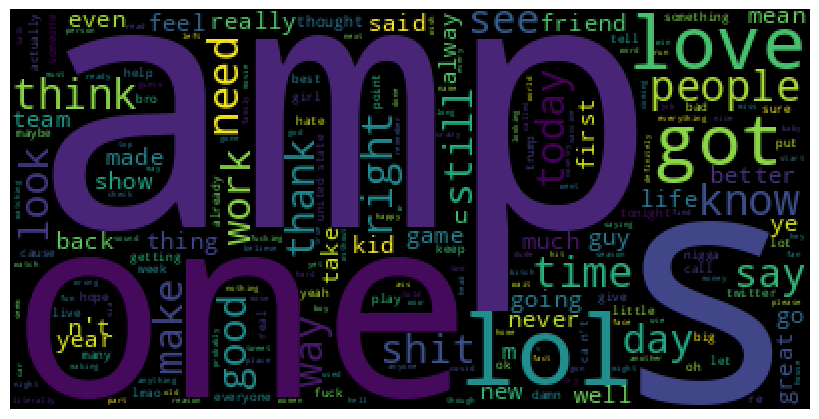

In [33]:
# Display the word map
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [35]:
# Convert the timestamp column to pandas Timestamp objects
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Extract date components
merged_df['year'] = merged_df['timestamp'].dt.year
merged_df['month'] = merged_df['timestamp'].dt.month
merged_df['day'] = merged_df['timestamp'].dt.day

# Extract clock time components
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df['minute'] = merged_df['timestamp'].dt.minute
merged_df['second'] = merged_df['timestamp'].dt.second

# Print the updated DataFrame
print(merged_df)


            id                                               text  \
0            0                   wow ’ know homies coming . lit .   
1            1           foggy nights peaceful calming chill vibe   
2            2                                    khamisvideobomb   
3            3                         anyone tryna hit gym 4 hmu   
4            4                              kidding intro crazy .   
...        ...                                                ...   
604201  604201  students must dressed appropriately day arrive...   
604202  604202         actually hate working lunch shift crew job   
604203  604203                              ’ reading thisyo mama   
604204  604204                                     mean secondddd   
604205  604205  mixing different kinds tide pods downy unstopp...   

             user_id           timestamp  cluster_id        lat         lng  \
0       5.853807e+07 2021-08-02 01:25:46           2  34.020789 -118.411907   
1       1.032

In [36]:
merged_df

,id,text,user_id,timestamp,cluster_id,lat,lng,language_label,year,month,day,hour,minute,second
0,0,wow ’ know homies coming . lit .,5.853807e+07,2021-08-02 01:25:46,2,34.020789,-118.411907,00,2021.0,8.0,2.0,1.0,25.0,46.0
1,1,foggy nights peaceful calming chill vibe,1.032647e+18,2021-08-28 08:47:36,2,34.020789,-118.411907,00,2021.0,8.0,28.0,8.0,47.0,36.0
2,2,khamisvideobomb,2.781174e+07,2021-08-13 15:49:15,2,34.020789,-118.411907,24,2021.0,8.0,13.0,15.0,49.0,15.0
3,3,anyone tryna hit gym 4 hmu,5.490040e+08,2021-08-31 22:41:20,2,34.020789,-118.411907,24,2021.0,8.0,31.0,22.0,41.0,20.0
4,4,kidding intro crazy .,2.963951e+07,2021-08-06 03:44:29,2,34.020789,-118.411907,04,2021.0,8.0,6.0,3.0,44.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604201,604201,students must dressed appropriately day arrive...,1.990241e+08,2021-08-12 11:08:07,2996,29.668301,-95.158936,00,2021.0,8.0,12.0,11.0,8.0,7.0
604202,604202,actually hate working lunch shift crew job,1.382980e+18,2021-08-04 15:35:10,2996,29.668301,-95.158936,00,2021.0,8.0,4.0,15.0,35.0,10.0
604203,604203,’ reading thisyo mama,1.039173e+18,2021-08-24 00:49:46,2996,29.668301,-95.158936,24,2021.0,8.0,24.0,0.0,49.0,46.0
604204,604204,mean secondddd,1.046619e+18,2021-08-02 17:02:13,2996,29.668301,-95.158936,00,2021.0,8.0,2.0,17.0,2.0,13.0


In [37]:
merged_df.to_csv('merged.csv', index=False)


In [40]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 13.6 MB/s eta 0:00:00


In [ ]:
import folium

# Get the minimum and maximum latitude and longitude values
min_lat, max_lat = merged_df['lat'].min(), merged_df['lat'].max()
min_lng, max_lng = merged_df['lng'].min(), merged_df['lng'].max()

# Calculate the center of the map and its initial zoom level
center_lat, center_lng = (min_lat + max_lat) / 2, (min_lng + max_lng) / 2
zoom_level = 10

# Create the map with the initial view centered at the calculated center and zoom level
m = folium.Map(location=[center_lat, center_lng], zoom_start=zoom_level)

# Add markers for each coordinate
for _, row in merged_df.iterrows():
    folium.Marker(location=[row['lat'], row['lng']]).add_to(m)

# Adjust the map's bounds to fit all the markers
m.fit_bounds([[min_lat, min_lng], [max_lat, max_lng]])

# Show the map
m


In [38]:
"""Added language labels and extracted out timestamp features"""

'Added language labels and extracted out timestamp features'

In [39]:
"""Try Kmeans model next time"""

'Try Kmeans model next time'